In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Epoch 0, Loss: 29696.47665412859
Epoch 100, Loss: 5376.41843809559
Epoch 200, Loss: 4874.75811691111
Epoch 300, Loss: 4501.729997435487
Epoch 400, Loss: 4220.662385042946
Epoch 500, Loss: 4005.7568518501685
Epoch 600, Loss: 3838.8198528735866
Epoch 700, Loss: 3706.981459776186
Epoch 800, Loss: 3601.1025842606377
Epoch 900, Loss: 3514.6624597386344
Epoch 1000, Loss: 3442.981176888369
Epoch 1100, Loss: 3382.6760135319264
Epoch 1200, Loss: 3331.2809398658733
Epoch 1300, Loss: 3286.980044817505
Epoch 1400, Loss: 3248.4205267346583
Epoch 1500, Loss: 3214.581279875239
Epoch 1600, Loss: 3184.680352454951
Epoch 1700, Loss: 3158.1096041726896
Epoch 1800, Loss: 3134.3884147930266
Epoch 1900, Loss: 3113.130753219115
Epoch 2000, Loss: 3094.0216311403883
Epoch 2100, Loss: 3076.8001617179402
Epoch 2200, Loss: 3061.2472787094803
Epoch 2300, Loss: 3047.176754288845
Epoch 2400, Loss: 3034.428560833693
Epoch 2500, Loss: 3022.8639063097644
Epoch 2600, Loss: 3012.3614716495745
Epoch 2700, Loss: 3002.81451

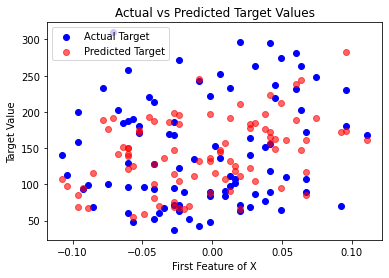

In [2]:


#1. Bring on the Data😎
data = load_diabetes()
df_X = data.data  # feature
df_y = data.target  # target


#2. Transform to Numpy array (X)
X = np.array(df_X)

#3. Transform to Numpy array (y)
y = np.array(df_y)


#4. Separate to Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5. Define Weights and bias : Initialize the Parameters
np.random.seed(42)
W = np.random.rand(X_train.shape[1]) #Weights
b = 0 #bias
epochs = 3000

#6. Loss Function : Calculating MSE
def lossfunc(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# 7. Define Gradient Function

def predict(X, W, b):
    return np.dot(X, W) + b


def gradient(X, y, W, b, learning_rate, epochs):
    n = len(y)
    for i in range(epochs):
        # Predicrtion Value
        y_pred = predict(X, W, b)

        # MSE Loss Calculation
        loss = lossfunc(y, y_pred)

        # Slope Calculation
        dw = -(2/n) * np.dot(X.T, (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)

        # Weights and bias Update
        W -= learning_rate * dw
        b -= learning_rate * db

        # Print Loss every 100 epokes
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss}")

    return W, b

#8. Define Hyperparameter
learning_rate = 0.1

#9.  Learning Model
W, b = gradient(X_train, y_train, W, b, learning_rate, epochs)

#10. Check the Performance about Test data 
y_pred = predict(X_test, W, b)
test_loss = lossfunc(y_test, y_pred)
print(f"Test Loss: {test_loss}")

#11. Visualization
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Target')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted Target', alpha=0.6)
plt.xlabel("First Feature of X")
plt.ylabel("Target Value")
plt.legend()
plt.title("Actual vs Predicted Target Values")
plt.show()